In [1]:
import os
import time
#mysys="jupyter" #
mysys="colab"
split="_90_5_5b_"
sn='sn_'
test_ratio=0.05

training_samples=18000
testing_samples=1000
validation_samples=1000

if mysys=="colab":
    from google.colab import drive
    drive.mount('/content/drive')
    in_path='/content/drive/MyDrive/UNSW_Data/'
    datapath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/'
    modelpath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/'
    slash="/"
    ML_path=datapath+'ml2/'
    STDN_path=ML_path+ '/ml/stdn/'
else:
    current_folder = os.getcwd() + kkk
    print(current_folder)
    slash="\\"
    path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\\'
    print(path)
    ML_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\\'
    STDN_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\stdn\\'

print(in_path)
print(datapath)

in_f_train= in_path + 'UNSW_NB15_training-set.csv'
in_f_test=in_path+'UNSW_NB15_testing-set.csv'
f_features=in_path+ 'UNSW_NB15_f.csv'
out_f_train=datapath+'unsw-nb15_training' + split +'.csv'
out_f_test=datapath+'unsw-nb15_testing' + split+ '.csv'
out_f_validation=datapath+'unsw-nb15_validation' + split+ '.csv'


in_f_features=in_path + 'UNSW_NB15_f.csv'
print(in_f_train)
print(in_f_test)
print(in_f_features)
print(out_f_train)
print(out_f_test)
print(out_f_validation)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UNSW_Data/
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_training-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_testing-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_f.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split

## Load UNSWNB-15 Data

In [3]:
df_train= pd.read_csv(in_f_train)
df_test=pd.read_csv(in_f_test)
df_features=pd.read_csv(in_f_features)
print(df_features.info())
print("--------------------------------------------")
print(df_train.info())
print("--------------------------------------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  


In [4]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0]/(df_train.shape[0]+df_test.shape[0]))
print(df_test.shape[0]/(df_train.shape[0]+df_test.shape[0]))

(175341, 45) (82332, 45)
0.6804787463180078
0.3195212536819923


In [5]:
# Count the number of samples in each class
class_counts_train =df_train['label'].value_counts()
print (class_counts_train)
cl0_c_tr=class_counts_train[0]/(class_counts_train[0]+class_counts_train[1])
cl1_c_tr=class_counts_train[1]/(class_counts_train[0]+class_counts_train[1])
print('Testing Ratio',  "{:.2f}".format(cl0_c_tr),  "{:.2f}".format(cl1_c_tr))

1    119341
0     56000
Name: label, dtype: int64
Testing Ratio 0.32 0.68


In [6]:
# Count the number of samples in each class
class_counts_test = df_test['label'].value_counts()
print (class_counts_test )
cl0_c_ts=class_counts_test[0]/(class_counts_test[0]+class_counts_test[1])
cl1_c_ts=class_counts_test[1]/(class_counts_test[0]+class_counts_test[1])
print('Testing Ratio',  "{:.2f}".format(cl0_c_ts),  "{:.2f}".format(cl1_c_ts))

1    45332
0    37000
Name: label, dtype: int64
Testing Ratio 0.45 0.55


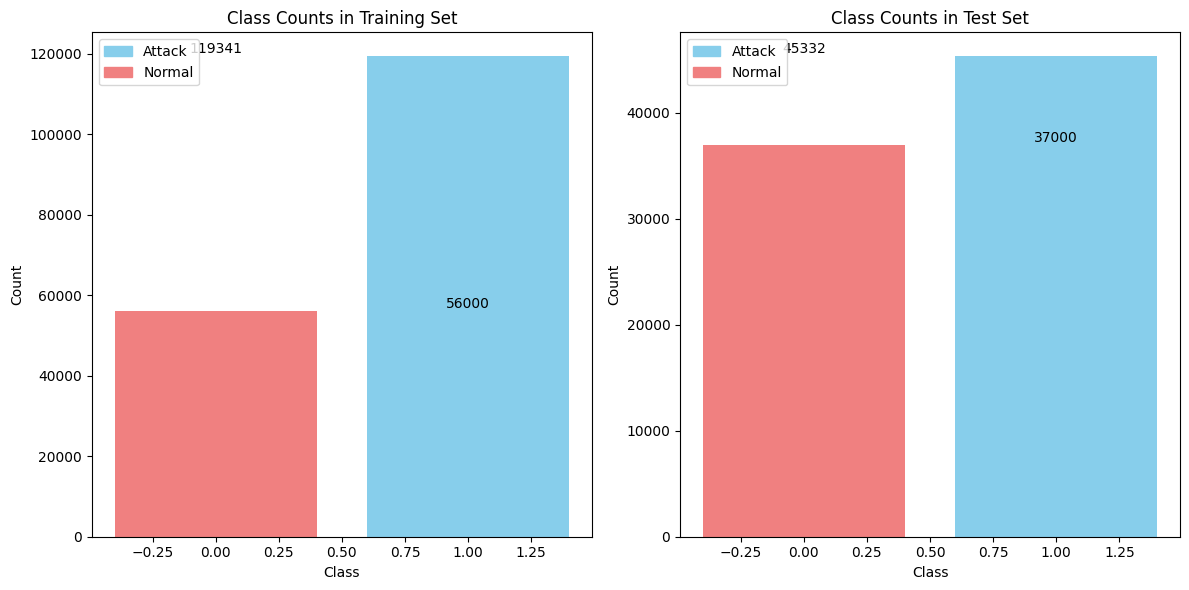

In [7]:

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot class counts for training set
axes[0].bar(class_counts_train.index, class_counts_train.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Class Counts in Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Annotate bars with class counts
for i, count in enumerate(class_counts_train.values):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

# Plot class counts for test set
axes[1].bar(class_counts_test.index, class_counts_test.values, color=['skyblue', 'lightcoral'])
axes[1].set_title('Class Counts in Test Set')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Annotate bars with class counts
for i, count in enumerate(class_counts_test.values):
    axes[1].text(i, count, str(count), ha='center', va='bottom')
# Create custom legends
legend_train = [mpatches.Patch(color='skyblue', label='Attack'), mpatches.Patch(color='lightcoral', label='Normal')]
legend_test = [mpatches.Patch(color='skyblue', label='Attack'), mpatches.Patch(color='lightcoral', label='Normal')]

# Add legend
axes[0].legend(handles=legend_train)
axes[1].legend(handles=legend_test)
# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [8]:
df = pd.concat([df_train, df_test])
df.shape

(257673, 45)

In [9]:
class_counts= df['label'].value_counts()
print (class_counts)
cl0_c=class_counts[0]/(class_counts[0]+class_counts[1])
cl1_c=class_counts[1]/(class_counts[0]+class_counts[1])
print('Training Ratio',  "{:.2f}".format(cl0_c),  "{:.2f}".format(cl1_c))

1    164673
0     93000
Name: label, dtype: int64
Training Ratio 0.36 0.64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [11]:
len(df)

257673

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df
# Separate samples based on class labels
class_0_samples = df[df['label'] == 0]
class_1_samples = df[df['label'] == 1]

total_samples = 186000
training_ratio = 0.90
validation_ratio = 0.05
testing_ratio = 0.05

training_samples = int(total_samples * training_ratio)
validation_samples = int(total_samples * validation_ratio)
testing_samples = int(total_samples * testing_ratio)

# Sample an equal number of samples from each class
n_samples_per_class = int(total_samples / 2)  # 10,000 samples per class for balance

balanced_class_0 = class_0_samples.sample(n=n_samples_per_class, replace=True)
balanced_class_1 = class_1_samples.sample(n=n_samples_per_class, replace=True)

# Combine the balanced samples
balanced_df = pd.concat([balanced_class_0, balanced_class_1])

# Split the balanced dataset into training, validation, and testing sets
train_df, temp_df = train_test_split(balanced_df, test_size=validation_samples + testing_samples, stratify=balanced_df['label'])
validation_df, test_df = train_test_split(temp_df, test_size=testing_samples / (validation_samples + testing_samples), stratify=temp_df['label'])

# Display the shapes of the resulting datasets
print("Training set shape:", train_df.shape)
print("Validation set shape:", validation_df.shape)
print("Testing set shape:", test_df.shape)
print("Training set ratio:", train_df.shape[0] / total_samples)
print("Validation set ratio:", validation_df.shape[0] / total_samples)
print("Testing set ratio:", test_df.shape[0] / total_samples)


Training set shape: (167400, 45)
Validation set shape: (9300, 45)
Testing set shape: (9300, 45)
Training set ratio: 0.9
Validation set ratio: 0.05
Testing set ratio: 0.05


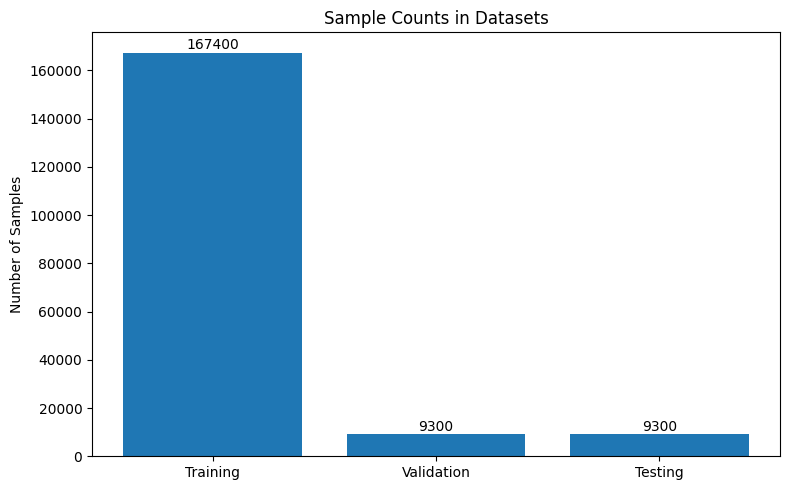

In [16]:
import matplotlib.pyplot as plt

# Set up the figure and axis for subplots
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the shapes of the resulting datasets
ax.bar(['Training', 'Validation', 'Testing'], [train_df.shape[0], validation_df.shape[0], test_df.shape[0]])
ax.set_title('Sample Counts in Datasets')
ax.set_ylabel('Number of Samples')

# Add text annotations for sample counts
for i, v in enumerate([train_df.shape[0], validation_df.shape[0], test_df.shape[0]]):
    ax.text(i, v + 100, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


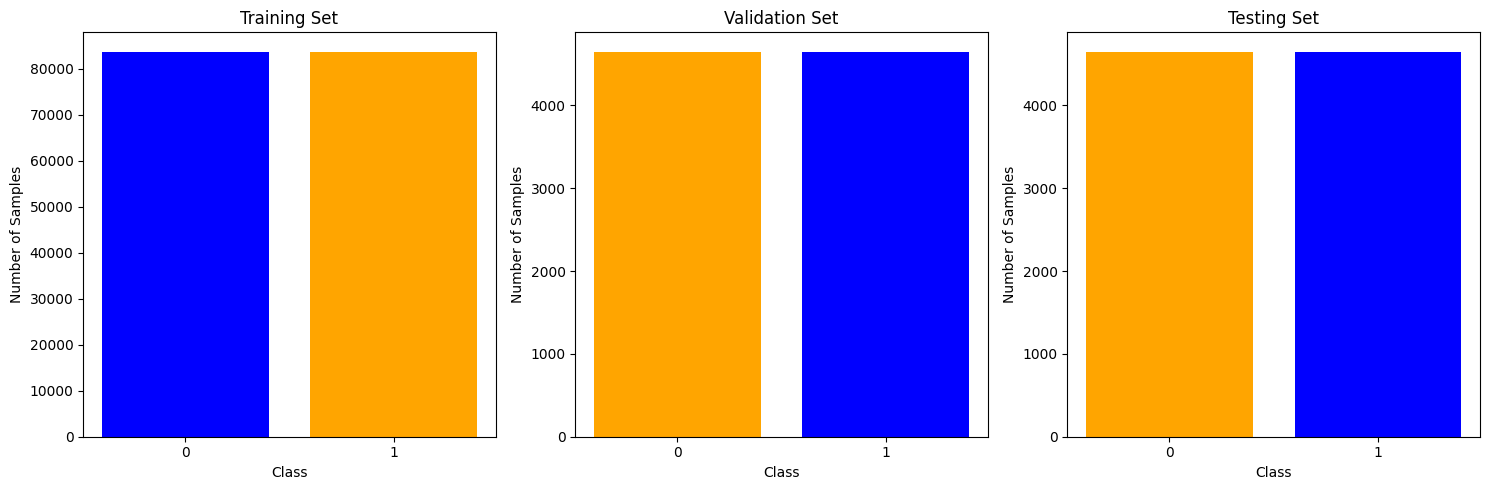

In [17]:
import matplotlib.pyplot as plt

# Calculate class counts for each dataset
class_counts_train = train_df['label'].value_counts()
class_counts_val = validation_df['label'].value_counts()
class_counts_test = test_df['label'].value_counts()

# Set up the figure and axis for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot class counts for training set
axs[0].bar(class_counts_train.index, class_counts_train.values, color=['blue', 'orange'])
axs[0].set_title('Training Set')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Number of Samples')
axs[0].set_xticks(class_counts_train.index)

# Plot class counts for validation set
axs[1].bar(class_counts_val.index, class_counts_val.values, color=['blue', 'orange'])
axs[1].set_title('Validation Set')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Number of Samples')
axs[1].set_xticks(class_counts_val.index)

# Plot class counts for testing set
axs[2].bar(class_counts_test.index, class_counts_test.values, color=['blue', 'orange'])
axs[2].set_title('Testing Set')
axs[2].set_xlabel('Class')
axs[2].set_ylabel('Number of Samples')
axs[2].set_xticks(class_counts_test.index)

plt.tight_layout()
plt.show()


Shuffle the training data before feeding it into the model during training.
Shuffling helps prevent the model from learning any patterns based on the order of the data and ensures that the model generalizes well.

In [18]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)  # random_state for reproducibility
train_df = train_df_shuffled

In [19]:
# Save training, test, and validation datasets to CSV files
train_df.to_csv(out_f_train, index=False)
test_df.to_csv(out_f_test, index=False)
validation_df.to_csv(out_f_validation, index=False)

# Print out the file names
print("Training dataset saved to:", out_f_train)
print("Test dataset saved to:", out_f_test)
print("Validation dataset saved to:", out_f_validation)

Training dataset saved to: /content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
Test dataset saved to: /content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
Validation dataset saved to: /content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv


In [20]:
# Define file paths
file_paths = [out_f_train, out_f_test, out_f_validation]

# Loop through each file
for file_path in file_paths:
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Get the sample size
    sample_size = len(data)

    # Calculate class ratio of the label field
    class_ratio = data['label'].value_counts(normalize=True)

    # Print the sample size and class ratio
    print("File:", file_path)
    print("Sample Size:", sample_size)
    print("Class Ratio:")
    print(class_ratio)
    print("\n")


File: /content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
Sample Size: 167400
Class Ratio:
0    0.5
1    0.5
Name: label, dtype: float64


File: /content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
Sample Size: 9300
Class Ratio:
1    0.5
0    0.5
Name: label, dtype: float64


File: /content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv
Sample Size: 9300
Class Ratio:
1    0.5
0    0.5
Name: label, dtype: float64




In [21]:
import datetime

# Get the current date and time
current_time = datetime.datetime.now()

# Format the current date and time
formatted_datetime = current_time.strftime("%Y-%m-%d %H:%M:%S")

# Print the formatted date and time
print("Formatted current date and time:", formatted_datetime)

Formatted current date and time: 2024-04-03 16:56:30
